# ME581 HW3 Solution [PYTHON]

Three modules will also be used throughout, and these are imported here:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

Two scripts are defined here and will be used in the following homework problems.

The first script applies the Gauss-Seidel Method algorithm defined in Section 3.8 of the textbook to solve the linear problem $Ax=b$.

The script takes in a left-hand-side matrix $A$ of coefficients, a right-hand-side vector $b$, an initial vector $x_{0}$, a maximum number of iterations $N_{max}$, and a convergence tolerance $tol$.

The script returns the resulting approximations $x_{n}$ of the solution $x$. The approximate solution is printed at each iteration, and the total number of iterations run is printed.

In [2]:
def gauss_seidel(A,b,x0,Nmax,tol):
   
   import numpy as np
   
   L = len(x0)
   xn = np.zeros([Nmax+1,L])
   xn[0,:] = x0
   
   for kk in range(1,Nmax+1):
      
      for jj in range(0,L):
         xn[kk,jj] = 1.0/A[jj,jj] * b[jj]
         for ii in range(0,L):
            if (ii < jj):
               xn[kk,jj] -= 1.0/A[jj,jj]*(A[jj,ii]*xn[kk  ,ii])
            if (ii > jj):
               xn[kk,jj] -= 1.0/A[jj,jj]*(A[jj,ii]*xn[kk-1,ii])
      
      LINFerr = max(abs( xn[kk,:] - xn[kk-1,:] ))
      if (LINFerr < tol):
         print("Convergence tolerance met")
         print("after {0:d} iterations".format(kk))
         xn = xn[0:kk+1,:]
         return(xn)
         
   print("\nConvergence tolerance not met")
   print("after Nmax = {0:d} iterations".format(Nmax))
   return(xn)   

The second script applies the Power Method algorithm defined in Section 4.1 of the textbook to calculate the dominant eigenvalue and associated eigenvector of the matrix $A$.

The script takes in a matrix $A$, an initial vector $x_{0}$, a maximum number of iterations $N_{max}$, and a convergence tolerance $tol$.

The script returns the resulting approximations ${\lambda}_{n}$ of the eigenvalue and the approximations $x_{n}$ of the associated eigenvector.

In [3]:
def power(A,x0,Nmax,tol):
   
   import numpy as np
   
   L =     len(x0)
   xn =    np.zeros([Nmax+1,L])
   ln =    np.zeros([Nmax+1  ])
   convn = np.zeros([Nmax+1  ])
   
   xn[0,:] = x0
   p = np.where(abs(xn[0,:])==max(abs(xn[0,:])))[0][0]
   
   for ii in range(1,Nmax+1):
      y = np.dot(A,xn[ii-1,:])
      ln[ii-1] = y[p]
      p = np.where(abs(y)==max(abs(y)))[0][0]
      xn[ii,:] = y/y[p] 
      if ii>1:
         convn[ii-1] = abs( (ln[ii-1]-ln[ii-2]) )
         #print("{0:d}\t".format(ii)+"["+\
         #      (L*"{:7.6f} ").format(*xn[ii,:])+"]^T  "+\
         #      "{0:9.6f}  ".format(ln[ii-1])+\
         #      "{0:7.6f} ".format(convn[ii-2]))
         
      LINFerr = max(abs( xn[ii,:] - xn[ii-1,:] ))
      if (LINFerr < tol):
         print("\Convergence tolerance met")
         print("after {0:d} iterations".format(ii))
         xn = xn[0:ii+1,:]
         return([ln,xn,convn])
   
   print("\nConvergence tolerance not met")
   print("after Nmax = {0:d} iterations".format(Nmax))
   return([ln,xn,convn])

Two functions are defined here for ease in plotting results:

In [4]:
def plot_lambda(xn,ln):
   l_ind_array = np.linspace(1,np.size(xn,0)-1,np.size(xn,0)-1)
   plt.plot(l_ind_array,ln[0:np.size(xn,0)-1],'r')
   red_patch = mpatches.Patch(color='red',label='$\lambda$')
   plt.legend(handles=[red_patch])
   plt.xlabel('Iteration Number')
   plt.ylabel('Eigenvalue $\lambda$')
   plt.show()

def plot_conv(xn,convn):
   c_ind_array = np.linspace(2,np.size(xn,0)-1,np.size(xn,0)-2)
   plt.plot(c_ind_array,convn[1:np.size(xn,0)-1],'b')
   blue_patch = mpatches.Patch(color='blue',label='$|{\lambda}^{(n)}-{\lambda}^{(n-1)}|$')
   plt.legend(handles=[blue_patch])
   plt.xlabel('Iteration Number')
   plt.ylabel('Convergence $|{\lambda}^{(n)}-{\lambda}^{(n-1)}|$')
   plt.show()

## Problem 1

Problem Statement:

Use the Gauss-Seidel method to solve the following system of equations. Take $x^{(0)}=0$, and terminate iteration when $||x^{(k+1)}-x^{(k)}||_{infty}$ falls below $5{\times}10^{-6}$. Print the final iteration of the solution. Record the number of iterations required to achieve convergence.

$\begin{matrix} 
-14x_{1} & +6x_{2}  &         &          &          & = & -8 \\
-9x_{1}  & +27x_{2} & +3x_{3} &          &          & = & -18 \\
         & 2x_{2}   & +6x_{3} & -2x_{4}  &          & = & 6 \\
         &          & -3x_{3} & +30x_{4} & -12x_{5} & = & 21 \\
         &          &         & -2x_{4}  & +3x_{5}  & = & 1
\end{matrix}$

Solution:

The script defined above to carry out the Gauss-Seidel method is applied to solve the provided system of equations. The approximate final solution is printed. The number of iterations required to achieve convergence is printed.

In [5]:
import numpy as np

A = np.array([ [ -14,   6,   0,   0,   0],  \
               [  -9,  27,   3,   0,   0],  \
               [   0,   2,   6,  -2,   0],  \
               [   0,   0,  -3,  30, -12],  \
               [   0,   0,   0,  -2,   3] ])

b = np.array(  [  -8, -18,   6,  21,   1] )
x0 = np.array( [   0,   0,   0,   0,   0] )
Nmax = 30
tol = 5.0*10**-6.0

xn = gauss_seidel(A,b,x0,Nmax,tol)

print("\nxn({:d}) = [".format(np.size(xn,0)-1)+(np.size(xn,1)*"{:7.6f} "). \
                     format(*xn[-1,:]) +"]^T")

Convergence tolerance met
after 12 iterations

xn(12) = [0.237994 -0.778016 1.716131 1.370380 1.246920 ]^T


## Problem 2

Problem Statement:

Each of the following matrices has a unique dominant eigenvalue of multiplicity one but does not possess a complete set of linearly independent eigenvectors.

For each matrix:

Using the initial vector provided, apply 30 iterations of the power method to determine the dominant eigenvalue and an associated eigenvector. Print the final values of the estimated vector, eigenvalue, and convergence $|{\lambda}^{(n)}-{\lambda}^{n-1}|$. Plot all iterations of the eigenvalue and convergence. Explain the behavior of the eigenvalue and eigenvector sequences.

(a)
$\begin{bmatrix} 
2 & 2 & 3 \\
0 & 2 & 0 \\
0 & 0 & 3
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 1 \\
 1 \\
 1
\end{bmatrix}$


(b)
$\begin{bmatrix} 
15 & -10 & 10 &  5 \\
28 & -18 & 18 & 14 \\
 9 &  -5 &  6 & 12 \\
-3 &   2 & -1 &  2
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 1 \\
 1 \\
 1 \\
 1
\end{bmatrix}$

Solution:

The script defined above to carry out the Power method is applied to find the dominant eigenvalue and its associated eigenvector for the provided matrices and initial vectors. The final vector, eigenvalue, and convergence $|{\lambda}^{(n)}-{\lambda}^{n-1}|$ are printed. The eigenvalue and convergence are plotted.

Problem 2 Part A:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                            lambda(n)  Convergence
30	[1.000000 0.000002 0.333317 ]^T   2.999935   0.000041 


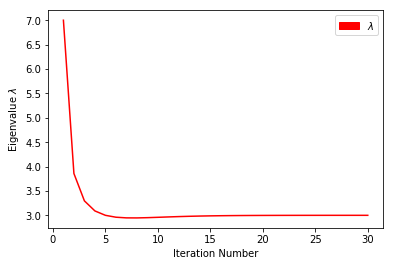

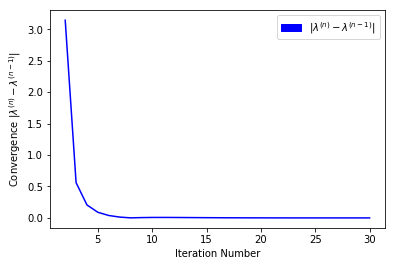

In [6]:
print("Problem 2 Part A:")
A = np.array([[2,2,3],[0,2,0],[0,0,3]])
x0 = np.array([1,1,1])
Nmax = 30
tol = 1.0*10**-16.0
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

Problem 2 Part B:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[0.500000 1.000000 0.500000 0.000000 ]^T   5.000000   0.000000 


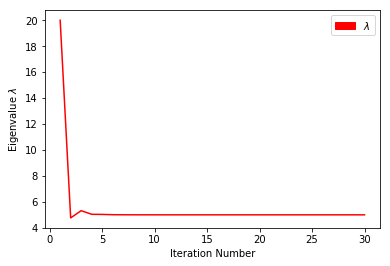

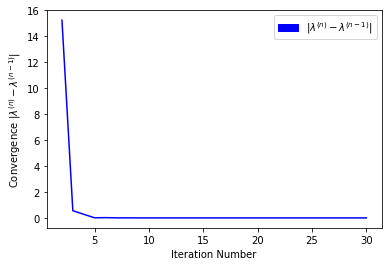

In [7]:
print("Problem 2 Part B:")
A = np.array([[15,-10,10,5],[28,-18,18,14],[9,-5,6,12],[-3,2,-1,2]])
x0 = np.array([1,1,1,1])
Nmax = 30
tol = 1.0*10**-16.0
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

When the matrix $A$ has a dominant eigenvalue of multiplicity one but does not possess a set of $n$ linearly independent eigenvectors, the power method is expected to converge to the dominant eigenvalue, though it may converge to a non-dominant eigenvalue.

For the initial vectors in both parts (a) and (b), the power method converged to the dominant eigenvalues and associated eigenvectors.

## Problem 3

Problem Statement:

Each of the following matrices has a unique dominant eigenvalue of multiplicity greater than one, and the eigenvalue does possess a complete set of linearly independent eigenvectors.

For each matrix:

Using each of the initial vectors provided, apply 30 iterations of the power method to determine the dominant eigenvalue and an associated eigenvector. Demonstrate that the eigenvalue sequence converges to the same value but the eigenvector sequence converges to different vectors. Print the final values of the estimated vector, eigenvalue, and convergence $|{\lambda}^{(n)}-{\lambda}^{(n-1)}|$. Plot all iterations of the eigenvalue and convergence. Explain the behavior of the eigenvalue and eigenvector sequences.

(a)
$\begin{bmatrix} 
7 &  0 & 0 \\
0 &  7 & 0 \\
5 & -1 & 5
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 1 \\
 1 \\
 1
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 -1 \\
  1 \\
 -1
\end{bmatrix}$

(b)
$\begin{bmatrix} 
 5 & -2 &  3 & -1 \\
-1 &  6 & -3 &  1 \\
-1 &  2 &  1 &  1 \\
 1 & -2 &  3 &  3
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 1 \\
 1 \\
 1 \\
 1
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 -1 \\
  1 \\
 -1 \\
  1
\end{bmatrix}$

Solution:

The script defined above to carry out the Power method is applied to find the dominant eigenvalue and its associated eigenvector for the provided matrices and initial vectors. The final vector, eigenvalue, and convergence $|{\lambda}^{(n)}-{\lambda}^{n-1}|$ are printed. The eigenvalue and convergence are plotted.

Problem 3 Part A #1:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                            lambda(n)  Convergence
30	[0.500010 0.500010 1.000000 ]^T   7.000058   0.000032 


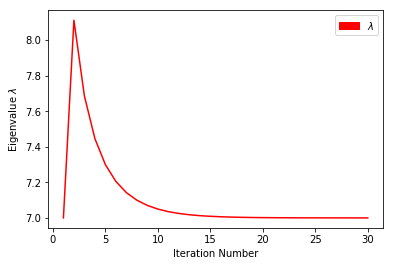

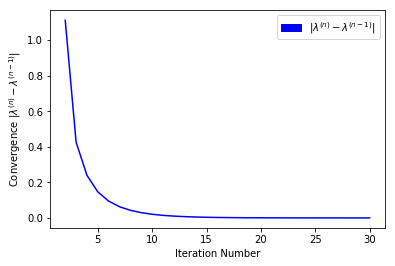


Problem 3 Part A #2:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                            lambda(n)  Convergence
30	[0.333343 -0.333343 1.000000 ]^T   7.000077   0.000043 


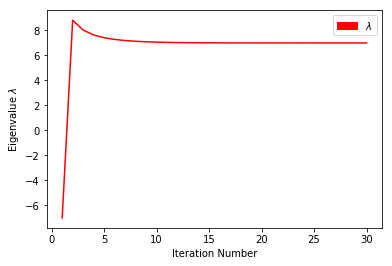

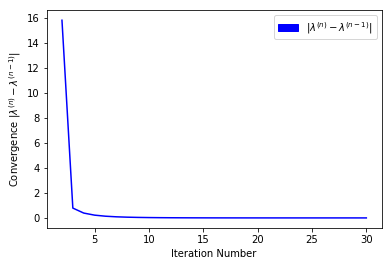

In [8]:
print("Problem 3 Part A #1:")
A = np.array([[7,0,0],[0,7,0],[5,-1,5]])
x0 = np.array([1,1,1])
Nmax = 30
tol = 1.0*10**-16.0
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)


print("\nProblem 3 Part A #2:")
x0 = np.array([-1,1,-1])
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

Problem 3 Part B #1:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[1.000000 0.000089 0.000089 1.000000 ]^T   4.000119   0.000053 


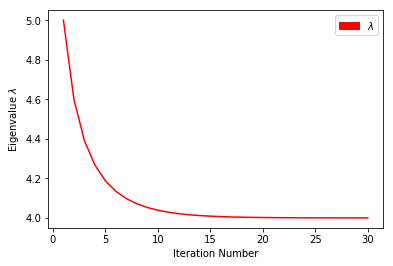

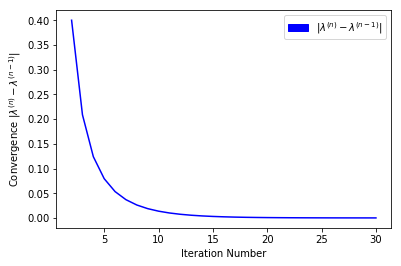


Problem 3 Part B #2:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[1.000000 -1.000000 -0.749961 0.749961 ]^T   4.000208   0.000093 


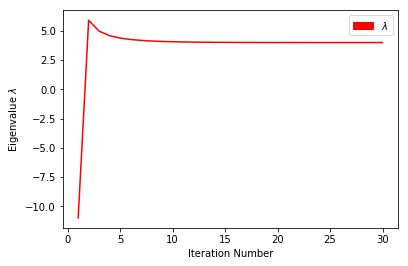

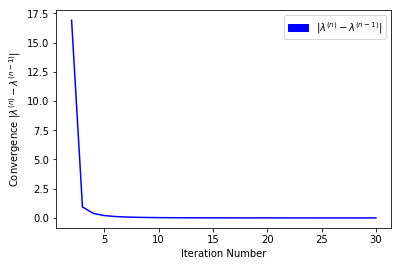

In [9]:
print("Problem 3 Part B #1:")
A = np.array([[5,-2,3,-1],[-1,6,-3,1],[-1,2,1,1],[1,-2,3,3]])
x0 = np.array([1,1,1,1])
Nmax = 30
tol = 1.0*10**-16.0
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

print("\nProblem 3 Part B #2:")
x0 = np.array([-1,1,-1,1])
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

When the matrix $A$ has a dominant eigenvalue of multiplicity greater than one and the eigenvalue does possess a complete set of linearly independent eigenvectors, the power method is expected to converge to the dominant eigenvalue and the eigenvector is expected to converge to some linear combination of the linearly independent eigenvectors, with the exact combination dependent on the chosen initial vector.

For the given initial vectors, the power method converged to the dominant eigenvalues for both initial vectors in (a) and (b). The eigenvectors converged to different eigenvectors which are (assumed here to be) linear combinations of the independent eigenvectors.

## Problem 4

Problem Statement:

Each of the following matrices has a unique dominant eigenvalue of multiplicity greater than one, but the eigenvalue does not possess a complete set of linearly independent eigenvectors.

For each matrix:

Using each of the initial vectors provided, apply 30 iterations of the power method to determine the dominant eigenvalue and an associated eigenvector. For each initial vector, print the final values of the estimated vector, eigenvalue, and convergence $|{\lambda}^{(n)}-{\lambda}^{(n-1)}|$ and plot all iterations of the eigenvalue and convergence. Explain the behavior of the eigenvalue and eigenvector sequences.

(a)
$\begin{bmatrix} 
0 & 0 & 0 &  1 \\
2 & 0 & 0 &  1 \\
0 & 2 & 0 & -3 \\
0 & 0 & 2 & -5
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 1 \\
 1 \\
 1 \\
 1
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 -1 \\
  1 \\
 -1 \\
  1
\end{bmatrix}$


(b)
$\begin{bmatrix} 
2 & 3 & 4 & 0 \\
0 & 2 & 3 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 1 \\
 1 \\
 1 \\
 1
\end{bmatrix}$
, $x_{0}=
\begin{bmatrix} 
 -1 \\
  1 \\
 -1 \\
  1
\end{bmatrix}$

Solution:

The script defined above to carry out the Power method is applied to find the dominant eigenvalue and its associated eigenvector for the provided matrices and initial vectors. The final vector, eigenvalue, and convergence $|{\lambda}^{(n)}-{\lambda}^{n-1}|$ are printed. The eigenvalue and convergence are plotted.

Problem 4 Part A #1:


Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[-0.329588 -0.011236 1.000000 0.681648 ]^T  -2.069767   0.002711 


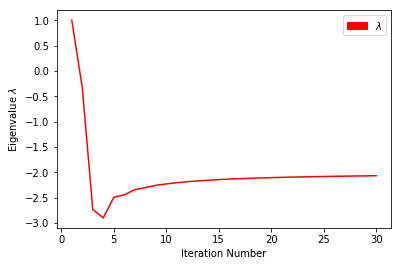

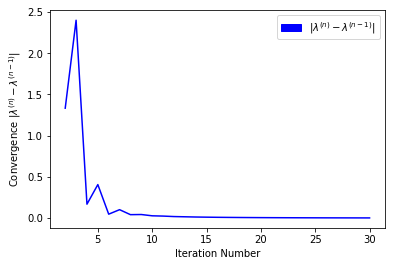


Problem 4 Part A #2:


Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[-0.326303 -0.021849 1.000000 0.697819 ]^T  -2.142026   0.005629 


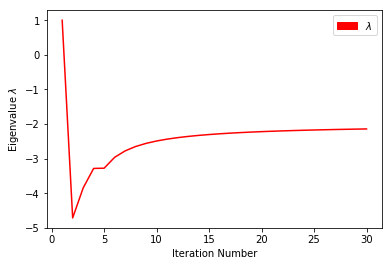

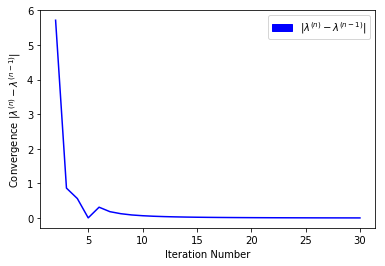

In [10]:
print("Problem 4 Part A #1:\n")
A = np.array([[0,0,0,1],[2,0,0,1],[0,2,0,-3],[0,0,2,-5]])
x0 = np.array([1,1,1,1])
Nmax = 30
tol = 1.0*10**-16.0
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

print("\nProblem 4 Part A #2:\n")
x0 = np.array([-1,1,-1,1])
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

Problem 4 Part B #1:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[1.000000 0.042406 0.000922 0.000000 ]^T   2.135335   0.005083 


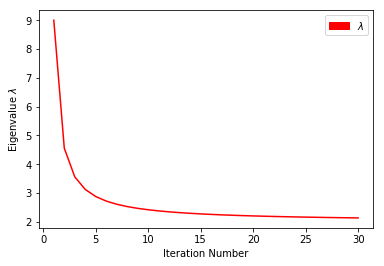

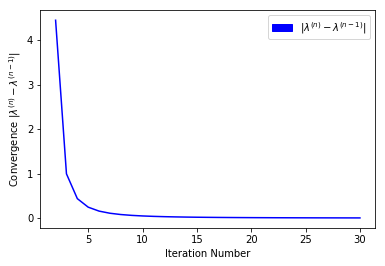


Problem 4 Part B #2:

Convergence tolerance not met
after Nmax = 30 iterations
n       x(n)^T                                     lambda(n)  Convergence
30	[1.000000 0.044232 0.001005 -0.000000 ]^T   2.141550   0.005580 


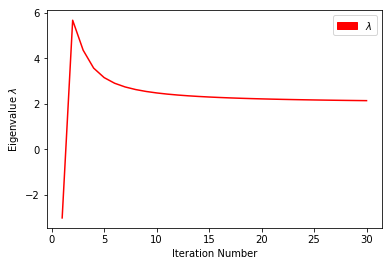

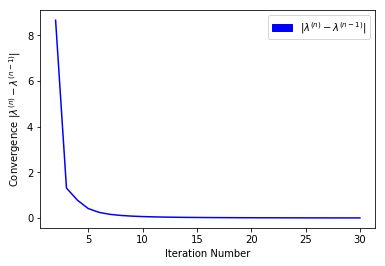

In [11]:
print("Problem 4 Part B #1:")
A = np.array([[2,3,4,0],[0,2,3,0],[0,0,2,0],[0,0,0,1]])
x0 = np.array([1,1,1,1])
Nmax = 30
tol = 1.0*10**-16.0
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)


print("\nProblem 4 Part B #2:")
x0 = np.array([-1,1,-1,1])
SOL = power(A,x0,Nmax,tol)
ln = SOL[0]
xn = SOL[1]
convn = SOL[2]
print("n       x(n)^T "+np.size(xn,1)*"         "+\
      "lambda(n)  Convergence")
print("{0:d}\t".format(np.size(xn,0)-1)+"["+\
      (np.size(xn,1)*"{:7.6f} ").format(*xn[-1,:])+"]^T  "+\
      "{0:9.6f}   ".format(ln[-2])+\
      "{0:7.6f} ".format(convn[-3]))
plot_lambda(xn,ln)
plot_conv(xn,convn)

When the matrix $A$ has a dominant eigenvalue of multiplicity greater than one but that eigenvalue does not possess a complete set of linearly independent eigenvectors, the power method is not expected to converge, although it may converge slowly.

For the given initial vectors, the power method appears to be converging slowly for both parts to the dominant eigenvalues and associated eigenvectors.